In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # transform into one-hot encoding.
y_test = tf.keras.utils.to_categorical(y_test, 10) # tf.keras.utils.to_categorical(y, num_classes=None, dtype='float32')

n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

batch_size = 256
n_epoch = 50

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2, activation='relu'))
    model.add(Dense(units=n_hidden3, activation='relu'))
    model.add(Dense(units=n_hidden4, activation='relu'))
    model.add(Dense(units=n_output, activation='softmax'))
    return model

SGD Model

In [7]:
dmlp_sgd = build_model()
dmlp_sgd.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy']) #optimizer = SGD()
hist_sgd = dmlp_sgd.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50


2024-12-22 20:30:39.607947: I external/local_xla/xla/service/service.cc:168] XLA service 0x75abe0b29940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-22 20:30:39.607970: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-22 20:30:39.618567: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1734867039.658216    9793 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 - 1s - loss: 1.4025 - accuracy: 0.6102 - val_loss: 0.8479 - val_accuracy: 0.7086 - 1s/epoch - 6ms/step
Epoch 2/50
235/235 - 0s - loss: 0.7199 - accuracy: 0.7604 - val_loss: 0.6676 - val_accuracy: 0.7755 - 421ms/epoch - 2ms/step
Epoch 3/50
235/235 - 0s - loss: 0.5997 - accuracy: 0.7973 - val_loss: 0.6032 - val_accuracy: 0.7872 - 427ms/epoch - 2ms/step
Epoch 4/50
235/235 - 0s - loss: 0.5469 - accuracy: 0.8100 - val_loss: 0.5774 - val_accuracy: 0.7969 - 422ms/epoch - 2ms/step
Epoch 5/50
235/235 - 0s - loss: 0.5086 - accuracy: 0.8248 - val_loss: 0.5313 - val_accuracy: 0.8100 - 420ms/epoch - 2ms/step
Epoch 6/50
235/235 - 0s - loss: 0.4838 - accuracy: 0.8317 - val_loss: 0.5017 - val_accuracy: 0.8225 - 411ms/epoch - 2ms/step
Epoch 7/50
235/235 - 0s - loss: 0.4720 - accuracy: 0.8343 - val_loss: 0.5070 - val_accuracy: 0.8241 - 417ms/epoch - 2ms/step
Epoch 8/50
235/235 - 0s - loss: 0.4539 - accuracy: 0.8418 - val_loss: 0.4898 - val_accuracy: 0.8307 - 430ms/epoch - 2ms/step
Epoch 9/50
235

Adam Model

In [8]:
dmlp_adam = build_model()
dmlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist_adam = dmlp_adam.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50


2024-12-22 20:33:12.123194: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


235/235 - 1s - loss: 0.5053 - accuracy: 0.8164 - val_loss: 0.4099 - val_accuracy: 0.8531 - 1s/epoch - 6ms/step
Epoch 2/50
235/235 - 0s - loss: 0.3540 - accuracy: 0.8707 - val_loss: 0.3884 - val_accuracy: 0.8595 - 443ms/epoch - 2ms/step
Epoch 3/50
235/235 - 0s - loss: 0.3192 - accuracy: 0.8825 - val_loss: 0.3583 - val_accuracy: 0.8714 - 444ms/epoch - 2ms/step
Epoch 4/50
235/235 - 0s - loss: 0.2954 - accuracy: 0.8907 - val_loss: 0.3879 - val_accuracy: 0.8667 - 448ms/epoch - 2ms/step
Epoch 5/50
235/235 - 0s - loss: 0.2770 - accuracy: 0.8960 - val_loss: 0.3317 - val_accuracy: 0.8778 - 440ms/epoch - 2ms/step
Epoch 6/50
235/235 - 0s - loss: 0.2588 - accuracy: 0.9027 - val_loss: 0.3673 - val_accuracy: 0.8759 - 444ms/epoch - 2ms/step
Epoch 7/50
235/235 - 0s - loss: 0.2485 - accuracy: 0.9059 - val_loss: 0.3394 - val_accuracy: 0.8853 - 445ms/epoch - 2ms/step
Epoch 8/50
235/235 - 0s - loss: 0.2408 - accuracy: 0.9089 - val_loss: 0.3440 - val_accuracy: 0.8790 - 454ms/epoch - 2ms/step
Epoch 9/50
235

Adagrad Model

In [9]:
dmlp_adagrad = build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])
hist_adagrad = dmlp_adagrad.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
235/235 - 1s - loss: 2.0016 - accuracy: 0.4145 - val_loss: 1.6543 - val_accuracy: 0.6401 - 1s/epoch - 5ms/step
Epoch 2/50
235/235 - 0s - loss: 1.3201 - accuracy: 0.6627 - val_loss: 1.0817 - val_accuracy: 0.6650 - 435ms/epoch - 2ms/step
Epoch 3/50
235/235 - 0s - loss: 0.9513 - accuracy: 0.6978 - val_loss: 0.8747 - val_accuracy: 0.7046 - 434ms/epoch - 2ms/step
Epoch 4/50
235/235 - 0s - loss: 0.8088 - accuracy: 0.7345 - val_loss: 0.7793 - val_accuracy: 0.7326 - 444ms/epoch - 2ms/step
Epoch 5/50
235/235 - 0s - loss: 0.7323 - accuracy: 0.7584 - val_loss: 0.7193 - val_accuracy: 0.7587 - 426ms/epoch - 2ms/step
Epoch 6/50
235/235 - 0s - loss: 0.6800 - accuracy: 0.7760 - val_loss: 0.6752 - val_accuracy: 0.7720 - 432ms/epoch - 2ms/step
Epoch 7/50
235/235 - 0s - loss: 0.6400 - accuracy: 0.7901 - val_loss: 0.6404 - val_accuracy: 0.7844 - 424ms/epoch - 2ms/step
Epoch 8/50
235/235 - 0s - loss: 0.6080 - accuracy: 0.8001 - val_loss: 0.6129 - val_accuracy: 0.7941 - 423ms/epoch - 2ms/step
Epo

RMSprop Model

In [10]:
dmlp_rmsprop = build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
hist_rmsprop = dmlp_rmsprop.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
235/235 - 1s - loss: 0.7088 - accuracy: 0.7388 - val_loss: 0.5881 - val_accuracy: 0.7915 - 1s/epoch - 5ms/step
Epoch 2/50
235/235 - 0s - loss: 0.4444 - accuracy: 0.8333 - val_loss: 0.4375 - val_accuracy: 0.8339 - 430ms/epoch - 2ms/step
Epoch 3/50
235/235 - 0s - loss: 0.3758 - accuracy: 0.8602 - val_loss: 0.4132 - val_accuracy: 0.8485 - 425ms/epoch - 2ms/step
Epoch 4/50
235/235 - 0s - loss: 0.3397 - accuracy: 0.8726 - val_loss: 0.3692 - val_accuracy: 0.8661 - 422ms/epoch - 2ms/step
Epoch 5/50
235/235 - 0s - loss: 0.3124 - accuracy: 0.8829 - val_loss: 0.4546 - val_accuracy: 0.8390 - 427ms/epoch - 2ms/step
Epoch 6/50
235/235 - 0s - loss: 0.2943 - accuracy: 0.8885 - val_loss: 0.3518 - val_accuracy: 0.8716 - 419ms/epoch - 2ms/step
Epoch 7/50
235/235 - 0s - loss: 0.2777 - accuracy: 0.8939 - val_loss: 0.3597 - val_accuracy: 0.8754 - 421ms/epoch - 2ms/step
Epoch 8/50
235/235 - 0s - loss: 0.2657 - accuracy: 0.8995 - val_loss: 0.3870 - val_accuracy: 0.8588 - 422ms/epoch - 2ms/step
Epo

#### print all of their accuracies

In [14]:
print(f"SGD Acc: {dmlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100}")
print(f"Adam Acc: {dmlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100}")
print(f"Adagrad Acc: {dmlp_adagrad.evaluate(x_test, y_test, verbose=0)[1]*100}")
print(f"RMSprop Acc: {dmlp_rmsprop.evaluate(x_test, y_test, verbose=0)[1]*100}")

SGD Acc: 87.81999945640564
Adam Acc: 89.88999724388123
Adagrad Acc: 85.25999784469604
RMSprop Acc: 88.73000144958496


#### Accuracy visualization

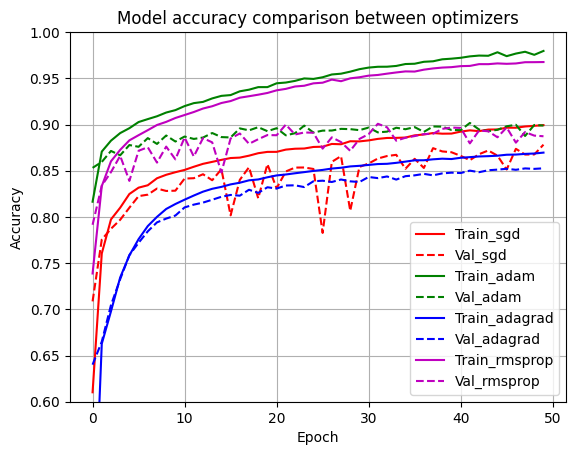

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'], 'r')
plt.plot(hist_sgd.history['val_accuracy'], 'r--')
plt.plot(hist_adam.history['accuracy'], 'g')
plt.plot(hist_adam.history['val_accuracy'], 'g--')
plt.plot(hist_adagrad.history['accuracy'], 'b')
plt.plot(hist_adagrad.history['val_accuracy'], 'b--')
plt.plot(hist_rmsprop.history['accuracy'], 'm')
plt.plot(hist_rmsprop.history['val_accuracy'], 'm--')

plt.title('Model accuracy comparison between optimizers')
plt.ylim(0.6, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd', 'Val_sgd', 'Train_adam', 'Val_adam', 'Train_adagrad', 'Val_adagrad', 'Train_rmsprop', 'Val_rmsprop'], loc='best')
plt.grid()
plt.show()

### Test result

Adam > RMSprop > SGD > Adagrad

* SGD: Using small learning rate.   
* Adagrad: Setting learning rate using accumulated information from previous gradient.   
* RMSprop: Improving Adagrad by removing effects from old information when accumulating previous gradient.   
* Adam: Improving RMSprop by applying momentum to it.   